### Ettoday 網路爬蟲實作練習
能夠利用 Request + BeatifulSour 撰寫爬蟲，並存放到合適的資料結構

若使用之前靜態網頁爬法，只能截取頁面上現有的，滑鼠下捲後新增的新聞會都爬不到。<br>
因此用selenium來輔助。

In [19]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

#打開網頁
browser = webdriver.Chrome(executable_path='./chromedriver')
browser.get('https://www.ettoday.net/news/news-list.htm')


<html itemscope="" itemtype="http://schema.org/WebSite" lang="zh-Hant" prefix="og:http://ogp.me/ns#" xmlns:wb="http://open.weibo.com/wb"><script async="" referrerpolicy="unsafe-url" src="https://de.tynt.com/deb/v2?id=bGee2M3Q0r4iaCacwqm_6r&amp;dn=TI&amp;cc=2&amp;r=" type="text/javascript"></script><script async="" src="https://s0.2mdn.net/instream/video/client.js" type="text/javascript"></script><script src="https://partner.googleadservices.com/gampad/cookie.js?domain=www.ettoday.net&amp;callback=_gfp_s_&amp;client=ca-pub-5538854675439600&amp;cookie=ID%3Dbf54ac34d7b8ae07%3AT%3D1595274741%3AS%3DALNI_MZ36M_KlspOmeSvVAv7x2ofK2UVcQ"></script><script async="" src="https://www.googletagmanager.com/gtm.js?id=GTM-NH3RQL3&amp;l=spotxDataLayer"></script><script async="" src="https://onead.onevision.com.tw/external.php?adid=&amp;category=-1&amp;cookie=true&amp;uid=1000019&amp;ip=&amp;volume=0&amp;channel=21&amp;isip_index=0&amp;response_freq_multiple=incover.1001-1002-1003-1004-1005-1006-1007-100
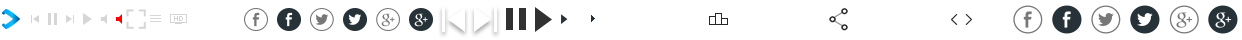
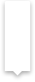
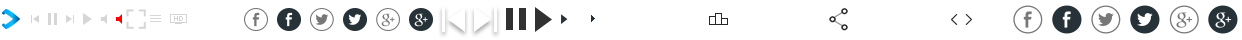

In [20]:
#每隔2秒往下滑(給電腦讀取資料時間)

for i in range(10):
    time.sleep(2)
    #scrollTo(xpos,ypos) x(y)：在視窗左上角的x(y)座標
    #x為左右移動(0,10000)，y為上下(0,10000) 0為最左(頂)，10000為最右(底)
    browser.execute_script('window.scrollTo(0,10000);')

html = browser.page_source
soup = BeautifulSoup(html,'html.parser')

soup
    
    

In [23]:
data = soup.find('div',class_='part_list_2').find_all('h3')

for d in data:
    time = d.find('span',class_='date').text
    tag = d.find('em',class_=re.compile('tag\s.+')).text
    title = d.find('a').text
    print(time,tag,title)


2020/07/21 02:52 社會 中和菜市場「巨獸級雨遮」瞬間崩裂從天降　美甲店慘遭30米鐵皮活埋
2020/07/21 02:26 生活 黑絲襪網美交大街訪「幾歲破處」　電子所宅男請求：可以踩我嗎？
2020/07/21 02:12 網搜 龍洞夜潛回家！海水腳印跟進房內…他拍暗處「驚見人臉」網全傻了
2020/07/21 02:08 財經 驚動郭台銘！陸企立訊蠶食台廠　鴻海董事長下令「提高警戒」
2020/07/21 01:57 影劇 深夜最新！諾蘭《TENET天能》無限期撤檔　《厲陰宅3》延期至2021年
2020/07/21 01:48 體育 中職／選秀正常舉行沒縮水　吳志揚：全世界唯一
2020/07/21 01:48 國際 男性新冠肺炎「死亡率更高」還不愛戴口罩！　盤點原因曝光
2020/07/21 01:32 體育 中職／王維中首位大聯盟狀元　合約有機會破郭泓志紀錄
2020/07/21 01:30 國際 牛津大學疫苗「可產生免疫反應」！　9月能生產100萬劑
2020/07/21 01:18 社會 男大生潑化骨水殺老翁…悲曝「舍友性侵」求交保　法官裁定出爐
2020/07/21 01:10 體育 中職／高中生選秀成主角　23人獲選史上最多
2020/07/21 00:54 時尚 無印良品超可愛收納小方塊　電線被完美捲起、還能充電有夠讚
2020/07/21 00:54 男女 開發新的高潮點！5個體位讓你更舒服
2020/07/21 00:49 社會 台南小姊妹體罰事件　幼兒園「暗黑內幕」被踢爆！市府介入追查
2020/07/21 00:48 地方 澎湖計程車司機超正！他一上車見亮點…網友推爆：包車團揪起來
2020/07/21 00:36 政治 「國民法官法」挑燈夜戰表決　參審適用案件、國民法官資格完成二讀
2020/07/21 00:28 國際 安倍邀習近平「國賓身分訪問」　62％日本人：應該取消
2020/07/21 00:26 地方 逼走基地台斷訊！　嘉縣水上鄉「手機訊號回來了」
2020/07/21 00:24 大陸 美防長憂中共帶領的中國崛起！陸外交部嗆：美方不應挑撥、製造對立
2020/07/21 00:21 社會 南鐵強拆「就是要殺人」　黃、陳2家拒遷擋拆！自救會怒吼：毀滅家庭
2020/07/21 00:16 影劇 12星座外貌協

In [24]:
browser.close()

### 今日作業：

1.取出今天所有的新聞


In [33]:
import datetime
import requests
from selenium.webdriver.chrome.options import Options
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import re

In [34]:
#因為從總覽資料去抓有資料上限的限制，所以改從分類分別把今日新聞截取
#先看依共有幾個分類(包含總覽在內)

url = 'https://www.ettoday.net/news/news-list.htm'
r = requests.get(url)
s = BeautifulSoup(r.text,'lxml')
s = s.find('div',class_='part_menu_2').find('ul',class_='clearfix').find_all('a')
print(len(s))


36


In [35]:
#找到今日日期並寫成正規表示式，方便之後篩選內文日期
today = datetime.datetime.today()
y = str(today.year)
m = str(today.month)
d = str(today.day)

seg = y+'/'+'[0]?'+m+'/'+'[0]?'+d
pat = re.compile(seg)

#觀察網址為：https://www.ettoday.net/news/news-list-2020-7-22-0.htm(年-月-日-分類)
#分類0為總覽，上面已知有36種分類，扣掉總覽要爬的為1～35

today_url = 'https://www.ettoday.net/news/news-list-'+y+'-'+m+'-'+d


In [38]:

#開起chrome的選項要求不要有通知視窗跳出
options = Options()
options.add_argument('--disable-notifications')

browser = webdriver.Chrome(executable_path='./chromedriver',options = options)

url = today_url+'-'+str(1)+'.htm'
browser.get(url)
for i in range(2):
    time.sleep(2)
    browser.execute_script('window.scrollTo(0,10000);')
html = browser.page_source
soup = BeautifulSoup(html,'lxml')
data = soup.find('div',class_='part_list_2').find_all('h3')
data

[<h3><span class="date">2020/07/22 00:05</span><em class="tag c_news">政治</em><a href="/news/20200722/1766146.htm" target="_blank">雙城論壇今登場鎖定「疫後治理」　台北連線上海選擇「思科」視訊</a></h3>,
 <h3><span class="date">2020/07/21 23:23</span><em class="tag c_news">政治</em><a href="/news/20200721/1766192.htm" target="_blank">疫情失控！「全球一天內死了7,630人」王浩宇酸：台灣人卻還在吵塑膠套</a></h3>,
 <h3><span class="date">2020/07/21 23:05</span><em class="tag c_news">政治</em><a href="/news/20200721/1766190.htm" target="_blank">總統府「電梯上上下下」傳鬧鬼！北市府回應了　4點反擊打臉</a></h3>,
 <h3><span class="date">2020/07/21 21:43</span><em class="tag c_news">政治</em><a href="/news/20200721/1766175.htm" target="_blank">「我們差點就沒有高鐵」　王浩宇痛批：馬英九曾說高鐵是廢鐵還拒搭</a></h3>,
 <h3><span class="date">2020/07/21 21:15</span><em class="tag c_news">政治</em><a href="/news/20200721/1766168.htm" target="_blank">李眉蓁涉論文抄襲　地方啟動追查...憂慮爆棚劍指江啟臣</a></h3>,
 <h3><span class="date">2020/07/21 20:57</span><em class="tag c_news">政治</em><a href="/news/20200721/1765921.htm" target="_blank"><i class="icon

In [ ]:
s = y+'/'+'[0]?'+m+'/'+'21'
p = re.compile(s)

for i in data:
    re.search

In [ ]:
for i in range(1,4):
    url = today_url+'-'+str(i)+'.htm'
    browser.get(url)
    for i in range(2):
        time.sleep(2)
        browser.execute_script('window.scrollTo(0,10000);')
    html = browser.page_source
    soup = BeautifulSoup(html,'lxml')
    data = soup.find('div',class_='part_list_2').find_all('h3')
    
    for d in data:
        t = d.find('span',class_='date').text
        tag = d.find('em',class_=re.compile('tag\s.+')).text
        title = d.find('a').text
        print(t,tag,title)

browser.close()

2.取出今天下午三點到五點的新聞

<re.Match object; span=(26, 40), match='    2021/01/03'>

3.根據範例，取出三天前下午三點到五點的新聞